## Koushik
## BL.EN.U4AIE21058
## Lab - 7


In [1]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
from hmmlearn import hmm

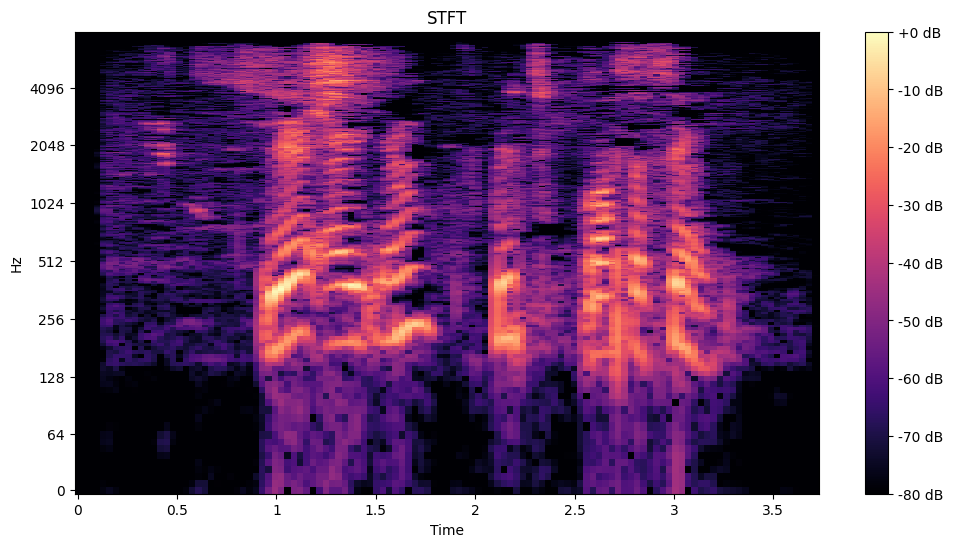

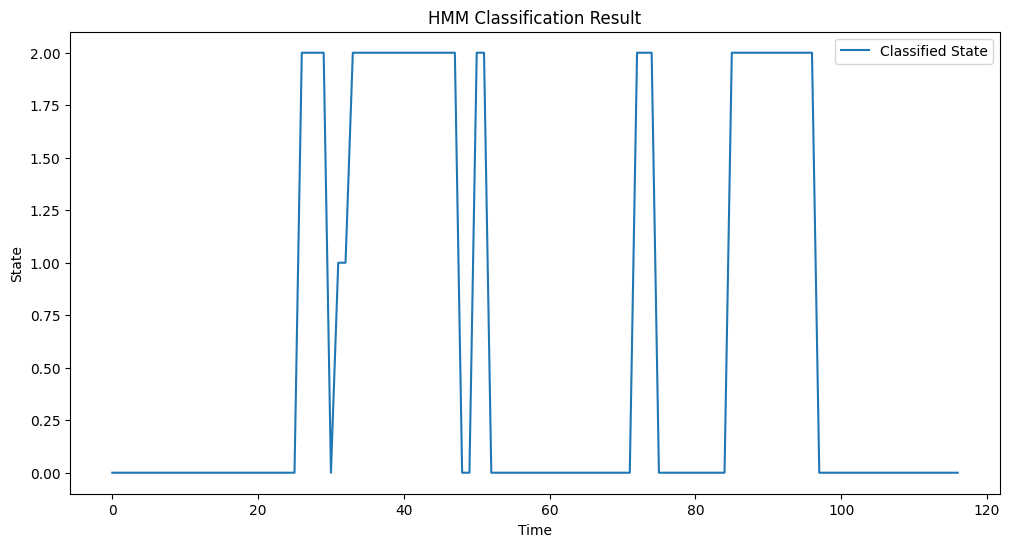

HMM Model Parameters:
Transition Matrix:
[[0.93589744 0.01282051 0.05128205]
 [0.         0.5        0.5       ]
 [0.13888889 0.         0.86111111]]
Means:
[[3.77767670e-02 3.84409590e-02 3.11315024e-02 ... 1.95177794e-04
  1.99330033e-04 2.08241629e-04]
 [6.33067653e-01 7.21759617e-01 6.63110733e-01 ... 2.42720496e-04
  2.56590465e-04 2.04125034e-04]
 [1.85197003e-01 2.09130965e-01 2.12629721e-01 ... 2.12729037e-04
  2.02564365e-04 1.83490270e-04]]
Covariances:
[[[0.00340847 0.         0.         ... 0.         0.         0.        ]
  [0.         0.00316862 0.         ... 0.         0.         0.        ]
  [0.         0.         0.00270183 ... 0.         0.         0.        ]
  ...
  [0.         0.         0.         ... 0.0001266  0.         0.        ]
  [0.         0.         0.         ... 0.         0.0001266  0.        ]
  [0.         0.         0.         ... 0.         0.         0.00012661]]

 [[0.03809837 0.         0.         ... 0.         0.         0.        ]
  [0. 

In [2]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
from hmmlearn import hmm

def load_audio(file_path):
    ydata, sr = librosa.load(file_path, sr=None)
    return ydata, sr

def stft_features(ydata, sr):
    stft = np.abs(librosa.stft(ydata))
    return stft

def train_hmm(features, n_components=3, n_iter=100):
    model = hmm.GaussianHMM(n_components=n_components, covariance_type="diag", n_iter=n_iter)
    model.fit(features)
    return model

def plot_stft(stft, sr):
    plt.figure(figsize=(12, 6))
    librosa.display.specshow(librosa.amplitude_to_db(stft, ref=np.max), sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title('STFT')
    plt.show()

def classify_signal(model, features):
    # Predict using the trained HMM model
    labels = model.predict(features.T)  # Transpose features to fit HMM's requirement
    return labels

def main():
    audio_file_path =r"./Lab7.wav"
    
    # Load audio
    y, sr = load_audio(audio_file_path)
    
    # Extract STFT features
    stft = stft_features(y, sr)
    
    # Plot STFT
    plot_stft(stft, sr)
    
    # Train HMM
    model = train_hmm(stft.T)  # Transpose stft to fit HMM's requirement
    
    # Classify signal using trained HMM
    labels = classify_signal(model, stft)
    
    # Plot the classification result
    plt.figure(figsize=(12, 6))
    plt.plot(np.arange(len(labels)), labels, label='Classified State')
    plt.xlabel('Time')
    plt.ylabel('State')
    plt.title('HMM Classification Result')
    plt.legend()
    plt.show()

    # Print trained model parameters
    print("HMM Model Parameters:")
    print("Transition Matrix:")
    print(model.transmat_)
    print("Means:")
    print(model.means_)
    print("Covariances:")
    print(model.covars_)
    
if __name__ == "__main__":
    main()
